## Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
initial_df=pd.read_csv('original_data_with_encoding.csv')
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data without Resampling

In [3]:
X = initial_df.drop('target',axis=1).values
Y = initial_df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [5]:
lr = LogisticRegression()

start_time = timeit.default_timer()
lr.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred=lr.predict(test_sc)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Time taken to fit the model in sec is  6.553605599999997
[[114633      0]
 [  4410      0]]


In [6]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred):.4f}")

Accuracy score:0.9630


* 1) If there is no oversampling the accuracy is 96.3.But as data is imbalanced data we don't need accuracy.Because majority of them are negative and model predicted all values as negative and so accuracy is high


In [7]:
print(f1_score(y_test, y_pred))

0.0


* 2) f2 score is 0 as there are no predicted values either correctly predicted (True positives)or wrongly predicted(False positives) as positive.
*    The accuracy is high as there are so many negatives and all values are predicted as negative

In [8]:
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Recall score : 0.0000
Precision score : 0.0000




* 3) Precision and recall values are 0

### Most Inference

* 4) All values are precited as negative as majority of values in dataset is negative.We are missing positive cases
So oversampling is needed to overcome this problem





### Data with Resampling and without OneHotEncoding

In [9]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [10]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [11]:
lr = LogisticRegression()

start_time = timeit.default_timer()
lr.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred=lr.predict(test_sc)

Time taken to fit the model in sec is  5.535669299999995


In [12]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.8897
F1 score : 0.8860
Recall score : 0.8548
Precision score : 0.9195


<AxesSubplot:>

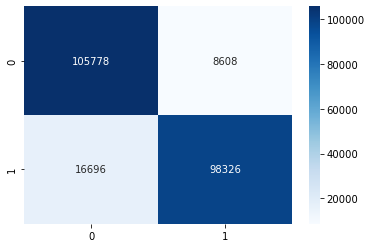

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='', cmap='Blues')

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89    114386
           1       0.92      0.85      0.89    115022

    accuracy                           0.89    229408
   macro avg       0.89      0.89      0.89    229408
weighted avg       0.89      0.89      0.89    229408



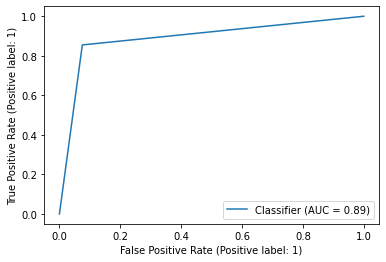

In [16]:
RocCurveDisplay.from_predictions(y_test, y_pred)

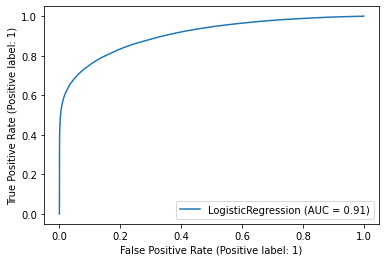

In [17]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [18]:
y_pred=lr.predict(train_sc)
print(f"Accuracy score: {accuracy_score(y_train, y_pred):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred):.4f}")

Accuracy score: 0.8899
F1 score : 0.8858
Recall score : 0.8552
Precision score : 0.9187


In [19]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Data with Resampling and with OneHotEncoding

In [20]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [21]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [22]:
lr1 = LogisticRegression()

start_time = timeit.default_timer()
lr1.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred1=lr1.predict(test_sc)


Time taken to fit the model in sec is  25.606106799999964


In [23]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score: 0.9026
F1 score : 0.8997
Recall score : 0.8718
Precision score : 0.9295


<AxesSubplot:>

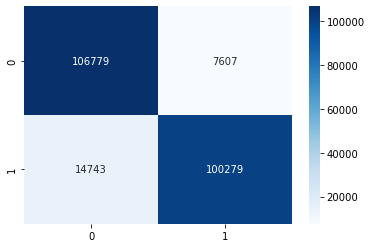

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, fmt='', cmap='Blues')

In [25]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408



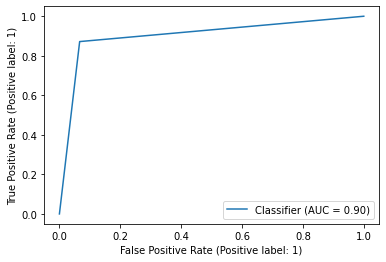

In [26]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

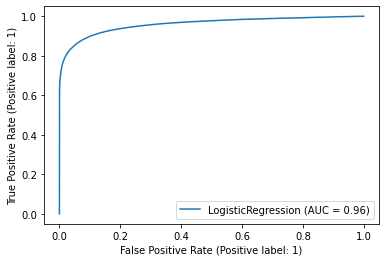

In [27]:
RocCurveDisplay.from_estimator(lr1, test_sc, y_test)

### Checking accuracy on training dataset

In [28]:
y_pred1=lr1.predict(train_sc)
print(f"Accuracy score: {accuracy_score(y_train, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred1):.4f}")

Accuracy score: 0.9031
F1 score : 0.9000
Recall score : 0.8720
Precision score : 0.9298


### One Hot Encoding improved accuracy

* 5) The accuracy score is 0.9024 and f1_score is 0.90 for both standard scaling and minmax scaling
* 6) f1_score is improved as data is balanced data due to oversampling



### Hyperparameter Tuning

In [31]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=None, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.902927 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.902927 (0.000957) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.900980 (0.001195) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.902924 (0.000954) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.902917 (0.000955) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.902901 (0.000955) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.902923 (0.000958) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.900970 (0.001065) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.902923 (0.000956) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.902915 (0.000955) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.902902 (0.000955) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.902914 (0.000948) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901069 (0.001078) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.902910 (0.000953) with: {'C': 1.0, 'penal

In [36]:
lr1.coef_

array([[-9.56935583e-02, -1.66980348e-01, -5.08117181e+00,
        -4.35150433e+00, -3.46592546e+00, -3.63948483e+00,
        -1.05373257e-01, -2.12335845e-01, -5.40875214e-01,
        -1.62063022e-01,  6.04183503e-01, -2.54641545e-01,
        -9.80132361e-01, -6.98307106e-01, -8.56671855e-01,
         8.08559453e-02,  1.28271397e-01, -2.97636111e-01,
        -1.72664638e-01, -4.90607866e-02,  7.03472180e-02,
         1.07381055e-02,  1.23687062e-03,  1.17181871e-02,
        -2.57568332e-01, -2.60194377e-01, -1.96503263e-01,
        -2.22242026e-01, -1.93232421e-01, -2.41152771e-01,
        -1.24759548e-01, -1.42583589e-01, -2.77875461e-01,
        -2.02296136e-01, -1.19313708e-01, -3.66389830e-01,
        -3.55542936e-01, -3.66483682e-01, -4.06039817e-01,
        -4.10007665e-01, -3.64226099e-01,  1.42056002e-01,
        -8.91202445e-02, -1.00366026e-01, -6.83319187e-02,
         1.68885293e-01, -1.68885293e-01, -7.42463869e-02,
         7.04644141e-02,  1.02491795e-01,  1.04068197e-0

In [45]:
feat_imp = pd.DataFrame({"Col": x_resampled_encoding.columns})
feat_imp["Coef"] = lr1.coef_[0]
feat_imp

,Col,Coef
0,ps_ind_01,-0.095694
1,ps_ind_03,-0.166980
2,ps_ind_06_bin,-5.081172
3,ps_ind_07_bin,-4.351504
4,ps_ind_08_bin,-3.465925
...,...,...
207,ps_car_11_cat_100,0.050130
208,ps_car_11_cat_101,0.069766
209,ps_car_11_cat_102,0.094703
210,ps_car_11_cat_103,0.111603


In [46]:
#Group OneHotEncoded features
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
#Scale Weights
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())
        / (feat_imp["Coef"].max() - feat_imp["Coef"].min())
    ).round(4)
feat_imp

,Col,Coef,FeatImp
46,ps_ind_14,6.041835e-01,1.0000
23,ps_car_06_cat,4.055344e-01,0.9651
20,ps_car_01_cat,2.778069e-01,0.9426
37,ps_ind_05_cat,1.701105e-01,0.9237
52,ps_reg_02,1.282714e-01,0.9163
51,ps_reg_01,8.085595e-02,0.9080
29,ps_car_11_cat,7.077713e-02,0.9062
32,ps_car_15,7.034722e-02,0.9061
2,ps_calc_03,1.171819e-02,0.8958
0,ps_calc_01,1.073811e-02,0.8956


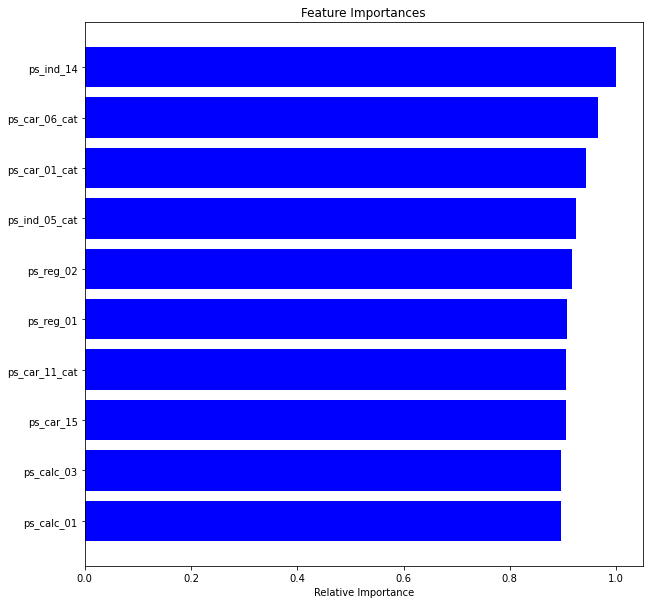

In [47]:
num_features = 10 

pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')

# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

* Logistic Regression takes importances of 48 columns out of 52 columns


### Performing Cross Validation

In [32]:
lr = LogisticRegression(solver='sag',max_iter=200)

start_time = timeit.default_timer()
lr.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(lr, X, Y, cv=5,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  352.82618309999816
Time taken to perform cv for the model in sec is  1713.2629760999698
Cv2 scores: [0.36417213 0.6693039  0.67169267 0.67212857 0.67413374]
Mean 5-Fold R Squared: 0.6102862038404651


In [33]:
lr = LogisticRegression(solver='sag',max_iter=200)

start_time = timeit.default_timer()
lr.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(lr, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  345.28897619998315
Time taken to perform cv for the model in sec is  3877.1906133000157
Cv2 scores: [0.054645   0.67146743 0.67310643 0.66679453 0.67376901 0.67219975
 0.67292922 0.67306871 0.67707907 0.67355693]
Mean 5-Fold R Squared: 0.6108616060665297


* We see that the metrics for folds in cross_val_score are uniform so it can be concluded that the model is able to generalise